## Abhishek Singh
## email : eshu180602@gmail.com

In [78]:
# importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
cars = pd.read_csv("https://raw.githubusercontent.com/imagineacreativeusername/oibsip-taskno-3/main/CarPrice_Assignment.csv")
# or
# cars = pd.read_csv('CarPrice_Assignment.csv')

In [80]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [81]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [82]:
cars['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [83]:
# Replace string values in the "cylindernumber" column
cars['cylindernumber'] = cars['cylindernumber'].replace({
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "eight": 8,
    "twelve": 12
})

In [84]:
# Convert categorical variables into numerical representations
label_encoder = LabelEncoder()

cars['CarName'] = label_encoder.fit_transform(cars['CarName'])
cars['fueltype'] = label_encoder.fit_transform(cars['fueltype'])
cars['aspiration'] = label_encoder.fit_transform(cars['aspiration'])
cars['doornumber'] = label_encoder.fit_transform(cars['doornumber'])
cars['carbody'] = label_encoder.fit_transform(cars['carbody'])
cars['drivewheel'] = label_encoder.fit_transform(cars['drivewheel'])
cars['enginelocation'] = label_encoder.fit_transform(cars['enginelocation'])
cars['fuelsystem'] = label_encoder.fit_transform(cars['fuelsystem'])
cars['enginetype'] = label_encoder.fit_transform(cars['enginetype'])

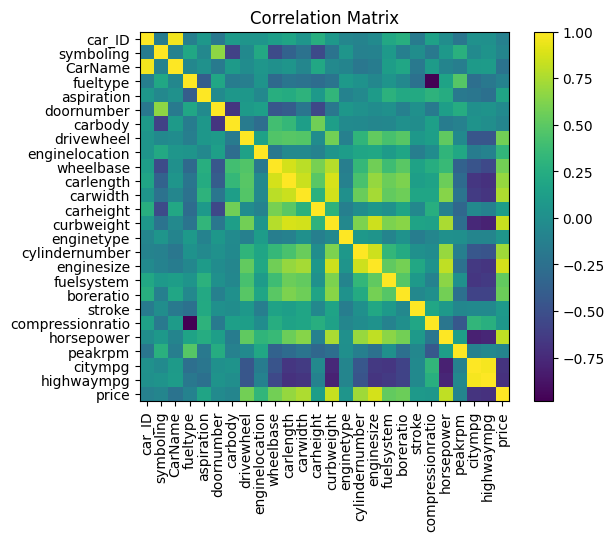

In [85]:
correlation_matrix = cars.corr()
plt.imshow(correlation_matrix, interpolation='nearest')
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

<Axes: xlabel='curbweight', ylabel='price'>

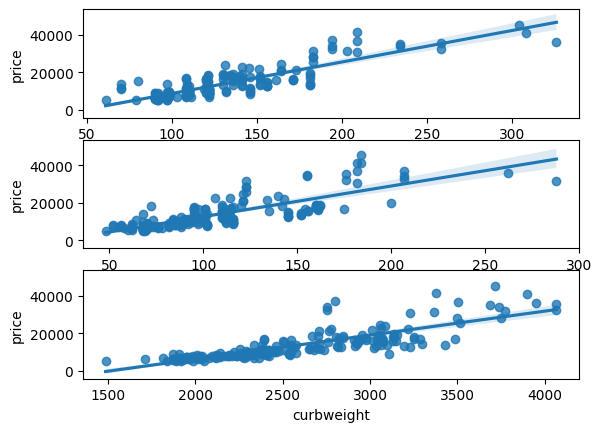

In [86]:
fig, axs = plt.subplots(3, 1, sharey=True)
sns.regplot(x='enginesize', y='price', data=cars, ax=axs[0])
sns.regplot(x='horsepower', y='price', data=cars, ax=axs[1])
sns.regplot(x='curbweight',y='price', data=cars, ax=axs[2])

<Axes: xlabel='highwaympg', ylabel='price'>

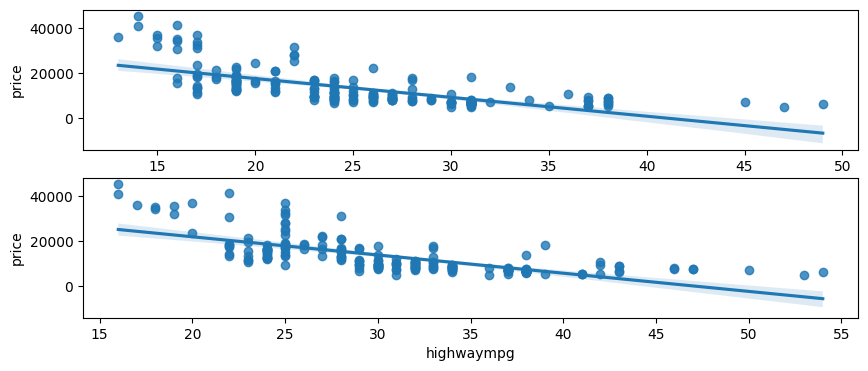

In [87]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize=(10,4))
sns.regplot(x='citympg', y='price', data=cars, ax=axs[0])
sns.regplot(x='highwaympg', y='price', data=cars, ax=axs[1])

In [88]:
X = cars.drop(columns=['car_ID', 'symboling', 'CarName', 'fueltype', 'peakrpm', 'price'],axis=1)
y = cars['price']

In [89]:
X.shape

(205, 20)

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [91]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [92]:
# RMS Error = Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 1552.6339008455625


In [93]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.9543988000289686
